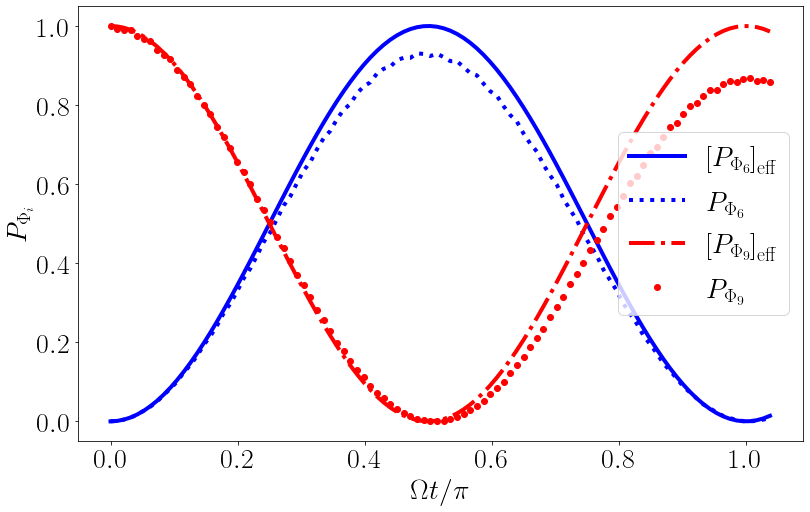

In [1]:
import numpy as np
import re ##Regular Expression##Pattern matching functions
from scipy.stats import binom
import math
import multiprocessing as mp
from qutip import *
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from qutip.qip.operations import *
from qutip.qip.circuit import *
basis_list = []
for i in range(2):
    for j in range(2):
        for l in range(2):
            for m in range(2):
                basis_list.append(tensor(basis(2,i), basis(2,j), basis(2,l), basis(2,m)))
d1up = tensor(sigmam(), qeye(2), qeye(2), qeye(2));
d1dw = tensor(sigmaz(), sigmam(), qeye(2), qeye(2));
d2up = tensor(sigmaz(), sigmaz(), sigmam(), qeye(2));
d2dw = tensor(sigmaz(), sigmaz(), sigmaz(), sigmam());
d1up_d = d1up.dag();
d1dw_d = d1dw.dag();
d2up_d = d2up.dag();
d2dw_d = d2dw.dag();
n1up = d1up_d * d1up;
n1dw = d1dw_d * d1dw;
n2up = d2up_d * d2up;
n2dw = d2dw_d * d2dw;
###########################################################
#####Initial value#############
Delta=0.05;
gamma=0.005;
J=4; 
Jl=1; 
DeltaZ1=0.5; 
DeltaZ2=0.5;
initState=ket2dm(basis_list[9]);
tsteps=100;
tmin=0.;
tmax=460.*np.pi;
precision=1E-10;
time_insts=np.linspace(tmin,tmax,tsteps);
###DecohOps###
AnnOps=[d1up,d1dw,d2up,d2dw];
DecohGamma=1E-4;
DecohOps=[]
for i in range(len(AnnOps)):
    DecohOps.append(np.sqrt(DecohGamma)*AnnOps[i])
####Projection operator####
Proj_0000=ket2dm(basis_list[0]);
Proj_1001=ket2dm(basis_list[9]);
Proj_0110=ket2dm(basis_list[6]);
Proj_1111=ket2dm(basis_list[15]);
###########################################################
Hs = Delta * (d1up_d * d2dw_d - d1dw_d * d2up_d);
Hct = gamma * (d1up_d * d2up + d1dw_d * d2dw);
Hc = J * (n1up * n1dw + n2up * n2dw);
Hc_2 = Jl * (n1up * n2up + n1up * n2dw);
Hc_2 = Hc_2 + Jl * (n1dw * n2up + n1dw * n2dw);
Hz = (DeltaZ1 / 2) * (n1up - n1dw);
Hz= Hz + (DeltaZ2 / 2) * (n2up - n2dw);
HamOp = Hs + Hs.dag() + Hct + Hct.dag() + Hc + Hc_2 + Hz;
TimeEvol=mesolve(HamOp,initState,time_insts,c_ops=[DecohOps[0],DecohOps[3]]);
OccVals=mesolve(HamOp,initState,time_insts,c_ops=[DecohOps[0],DecohOps[3]],e_ops=[Proj_0110,Proj_1001]);
###Plotting Occupation expectation values###
rc('font',**{'family':'sans-serif','sans-serif':['Helvatica'], 'size': 28})
rc('text',usetex=True)
LineStyles=['-',':','-.','o','v','s','+','*','x']
Omega=np.abs(-Delta*Delta*((1./Jl)-(1./((2.*J)+(3.*Jl))))-(2.*gamma*gamma/(Jl-J)));
scaled_time=np.linspace((Omega/(np.pi))*tmin,(Omega/(np.pi))*tmax,tsteps);
P9=[np.cos(np.pi*scaled_time[i])*np.cos(np.pi*scaled_time[i]) for i in range(len(time_insts))];
P6=[np.sin(np.pi*scaled_time[i])*np.sin(np.pi*scaled_time[i]) for i in range(len(time_insts))];
fig,axtr=plt.subplots(1,1,figsize=(13, 8))
axtr.plot(scaled_time,P6,'b-',linewidth=4)
axtr.plot(scaled_time,OccVals.expect[0],'b:',linewidth=4)
axtr.plot(scaled_time,P9,'r-.',linewidth=4)
axtr.plot(scaled_time,OccVals.expect[1],'ro',linewidth=4)
axtr.set_xlabel(r'$\Omega t/\pi$');
axtr.set_ylabel(r'$P_{\Phi_i}$');
axtr.legend([r'$\left[P_{\Phi_6}\right]_{\mathrm{eff}}$',r'$P_{\Phi_6}$',r'$\left[P_{\Phi_9}\right]_{\mathrm{eff}}$',r'$P_{\Phi_9}$'],loc='right');
plt.show()
fig.savefig('fig_3_new.pdf')